In [1]:
import os
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rasterio as rio
%matplotlib inline

In [2]:
HYDRO1 = glob.glob('../input10/**/*_hydinfo1.txt', recursive=True)
HYDRO2 = glob.glob('../input10/**/*_hydinfo2.txt', recursive=True)
HYDRO3 = glob.glob('../input10/**/*_hydinfo3.txt', recursive=True)
HYDRO4 = glob.glob('../input10/**/*_hydinfo4.txt', recursive=True)
HYDRO5 = glob.glob('../input10/**/*_hydinfo5.txt', recursive=True)

print(len(HYDRO1))

for i in HYDRO1:
    print(i)

12
../input10\11_results\11_files\11_hydinfo1.txt
../input10\12_results\12_files\12_hydinfo1.txt
../input10\13_results\13_files\13_hydinfo1.txt
../input10\14_results\14_files\14_hydinfo1.txt
../input10\21_results\21_files\21_hydinfo1.txt
../input10\22_results\22_files\22_hydinfo1.txt
../input10\23_results\23_files\23_hydinfo1.txt
../input10\24_results\24_files\24_hydinfo1.txt
../input10\41_results\41_files\41_hydinfo1.txt
../input10\42_results\42_files\42_hydinfo1.txt
../input10\43_results\43_files\43_hydinfo1.txt
../input10\44_results\44_files\44_hydinfo1.txt


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

In [3]:
from matplotlib import pyplot as plt


def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())

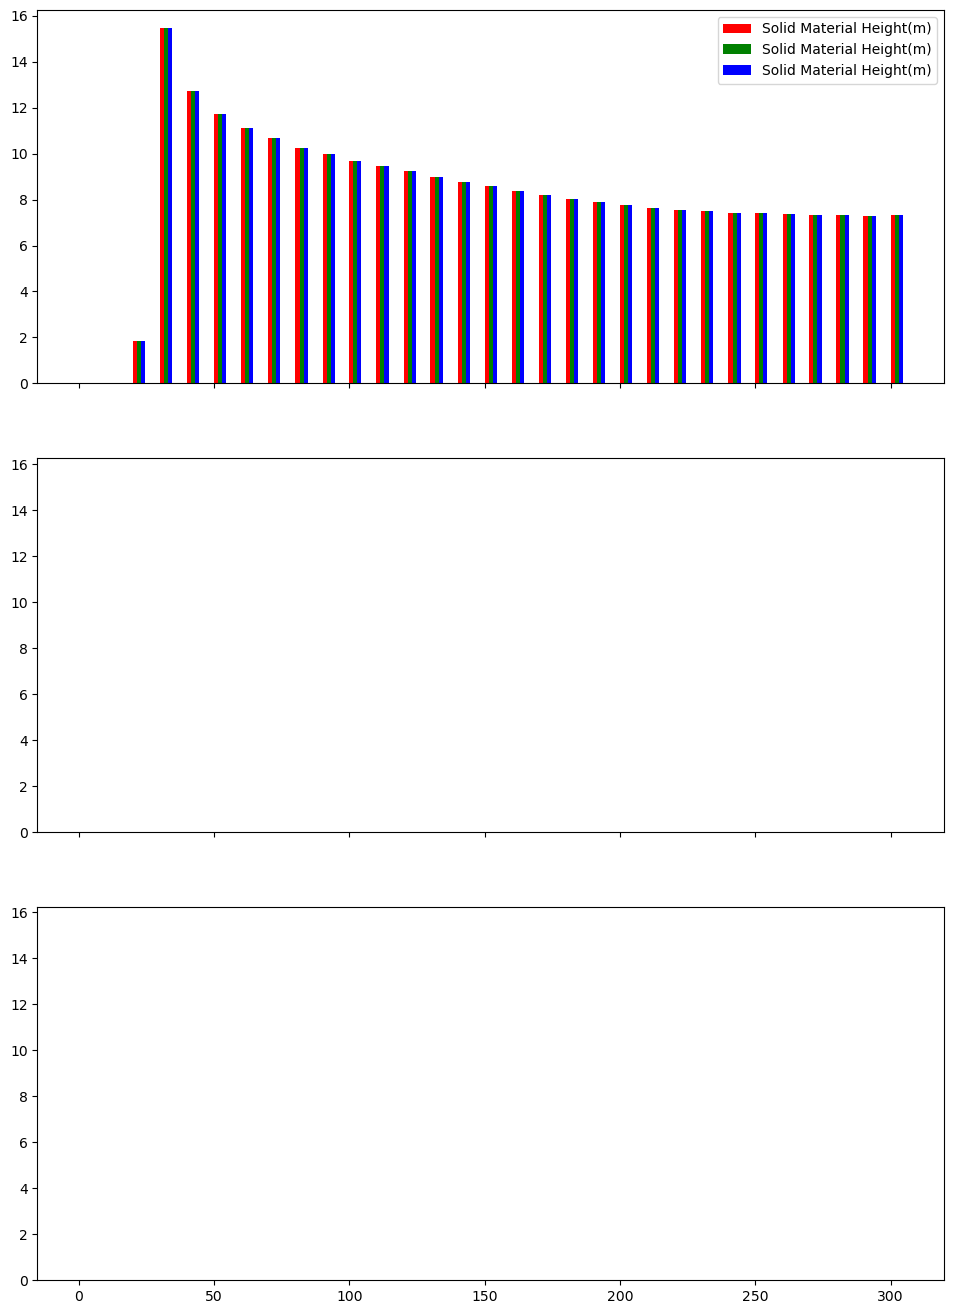

In [4]:
fig, ax = plt.subplots(3,1, sharex=True, sharey=True, figsize=(11.7,16.5))
df = pd.read_csv(HYDRO1[11], sep='\t')
df.head()
width=1.5
# bar_plot(ax[0], data={'H1': df['H1'], "H2": df['H3']}, total_width=0.8, single_width=0.9)
ax[0].bar(df['T'], df['H1'], width=1.5, color='r',align='edge', label='Solid Material Height(m)')
ax[0].bar(df['T']+width, df['H1'], width=1.5,color='g',align='edge', label='Solid Material Height(m)')
ax[0].bar(df['T']+width*2, df['H1'], width=1.5,color='b',align='edge', label='Solid Material Height(m)')
# # ax[0].plot(df['T'], (df['Q1'] + df['Q3'])/1000, label='Hydrograph (m^3/s)')
ax[0].legend()
# ax[0].xaxis_date()

In [5]:
def print_stacked_multiple_bars(in_files=[], graph_title=[], out_location='', bar_width=2, xlim=None):

    fig, ax = plt.subplots(3,1, sharex=True, sharey=True, figsize=(11.7,16.5))

    for i, hydro in enumerate(in_files):
        df = pd.read_csv(hydro, sep='\t')
        if i==0:
            ax[0].bar(df['T']+bar_width*(i-2), df['H1'], width=bar_width, label = 'LS11 (Solid)')
            ax[0].bar(df['T']+bar_width*(i-2), df['H3'], width=bar_width, label='LS11 (Fluid)', bottom=df['H1'])

        if i ==1:
            ax[0].bar(df['T']+bar_width*(i-2), df['H1'],color='#bcbd22', width=bar_width, label = 'LS12 (Solid)')
            ax[0].bar(df['T']+bar_width*(i-2), df['H3'], color='#d62728', width=bar_width, label='LS12 (Fluid)', bottom=df['H1'])

        if i ==2:
            ax[0].bar(df['T']+bar_width*(i-2), df['H1'], color='#2ca02c', width=bar_width, label = 'LS13 (Solid)')
            ax[0].bar(df['T']+bar_width*(i-2), df['H3'], color='#17becf', width=bar_width, label='LS13 (Fluid)', bottom=df['H1'])

        if i ==3:
            ax[0].bar(df['T']+bar_width*(i-2), df['H1'], color='#1f77b4', width=bar_width, label = 'LS14 (Solid)')
            ax[0].bar(df['T']+bar_width*(i-2), df['H3'], color='#ff7f0e', width=bar_width, label='LS14 (Fluid)', bottom=df['H1'])

        if i==4:
            ax[1].bar(df['T']+bar_width*(i-2), df['H1'], width=bar_width, label = 'LS21 (Solid)')
            ax[1].bar(df['T']+bar_width*(i-2), df['H3'], width=bar_width, label='LS21 (Fluid)', bottom=df['H1'])

        if i ==5:
            ax[1].bar(df['T']+bar_width*(i-2), df['H1'],color='#bcbd22', width=bar_width, label = 'LS22 (Solid)')
            ax[1].bar(df['T']+bar_width*(i-2), df['H3'], color='#d62728', width=bar_width, label='LS22 (Fluid)', bottom=df['H1'])

        if i ==6:
            ax[1].bar(df['T']+bar_width*(i-2), df['H1'], color='#2ca02c', width=bar_width, label = 'LS23 (Solid)')
            ax[1].bar(df['T']+bar_width*(i-2), df['H3'], color='#17becf', width=bar_width, label='LS23 (Fluid)', bottom=df['H1'])

        if i ==7:
            ax[1].bar(df['T']+bar_width*(i-2), df['H1'], color='#1f77b4', width=bar_width, label = 'LS24 (Solid)')
            ax[1].bar(df['T']+bar_width*(i-2), df['H3'], color='#ff7f0e', width=bar_width, label='LS24 (Fluid)', bottom=df['H1'])

        if i==8:
            ax[2].bar(df['T']+bar_width*(i-2), df['H1'], width=bar_width, label = 'LS31 (Solid)')
            ax[2].bar(df['T']+bar_width*(i-2), df['H3'], width=bar_width, label='LS31 (Fluid)', bottom=df['H1'])

        if i ==9:
            ax[2].bar(df['T']+bar_width*(i-2), df['H1'],color='#bcbd22', width=bar_width, label = 'LS32 (Solid)')
            ax[2].bar(df['T']+bar_width*(i-2), df['H3'], color='#d62728', width=bar_width, label='LS32 (Fluid)', bottom=df['H1'])

        if i ==10:
            ax[2].bar(df['T']+bar_width*(i-2), df['H1'], color='#2ca02c', width=bar_width, label = 'LS33 (Solid)')
            ax[2].bar(df['T']+bar_width*(i-2), df['H3'], color='#17becf', width=bar_width, label='LS33 (Fluid)', bottom=df['H1'])

        if i ==11:
            ax[2].bar(df['T']+bar_width*(i-2), df['H1'], color='#1f77b4', width=bar_width, label = 'LS34 (Solid)')
            ax[2].bar(df['T']+bar_width*(i-2), df['H3'], color='#ff7f0e', width=bar_width, label='LS34 (Fluid)', bottom=df['H1'])
            
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()

    # ax[0].set_xlabel("Time (s)")
    # ax[0].set_ylabel("Discharge (m^3/s)")
    ax[0].set_title(graph_title[0])

    # ax[1].set_xlabel("Time (s)")
    ax[1].set_ylabel("Flow Height (m)")
    ax[1].set_title(graph_title[1])

    ax[2].set_xlabel("Time (s)")
    # ax[2].set_ylabel("Discharge (m^3/s)")
    ax[2].set_title(graph_title[2])

    plt.tight_layout()
    if out_location:
        plt.savefig(out_location, dpi=500)
    
    if xlim:
        plt.xlim(xlim)

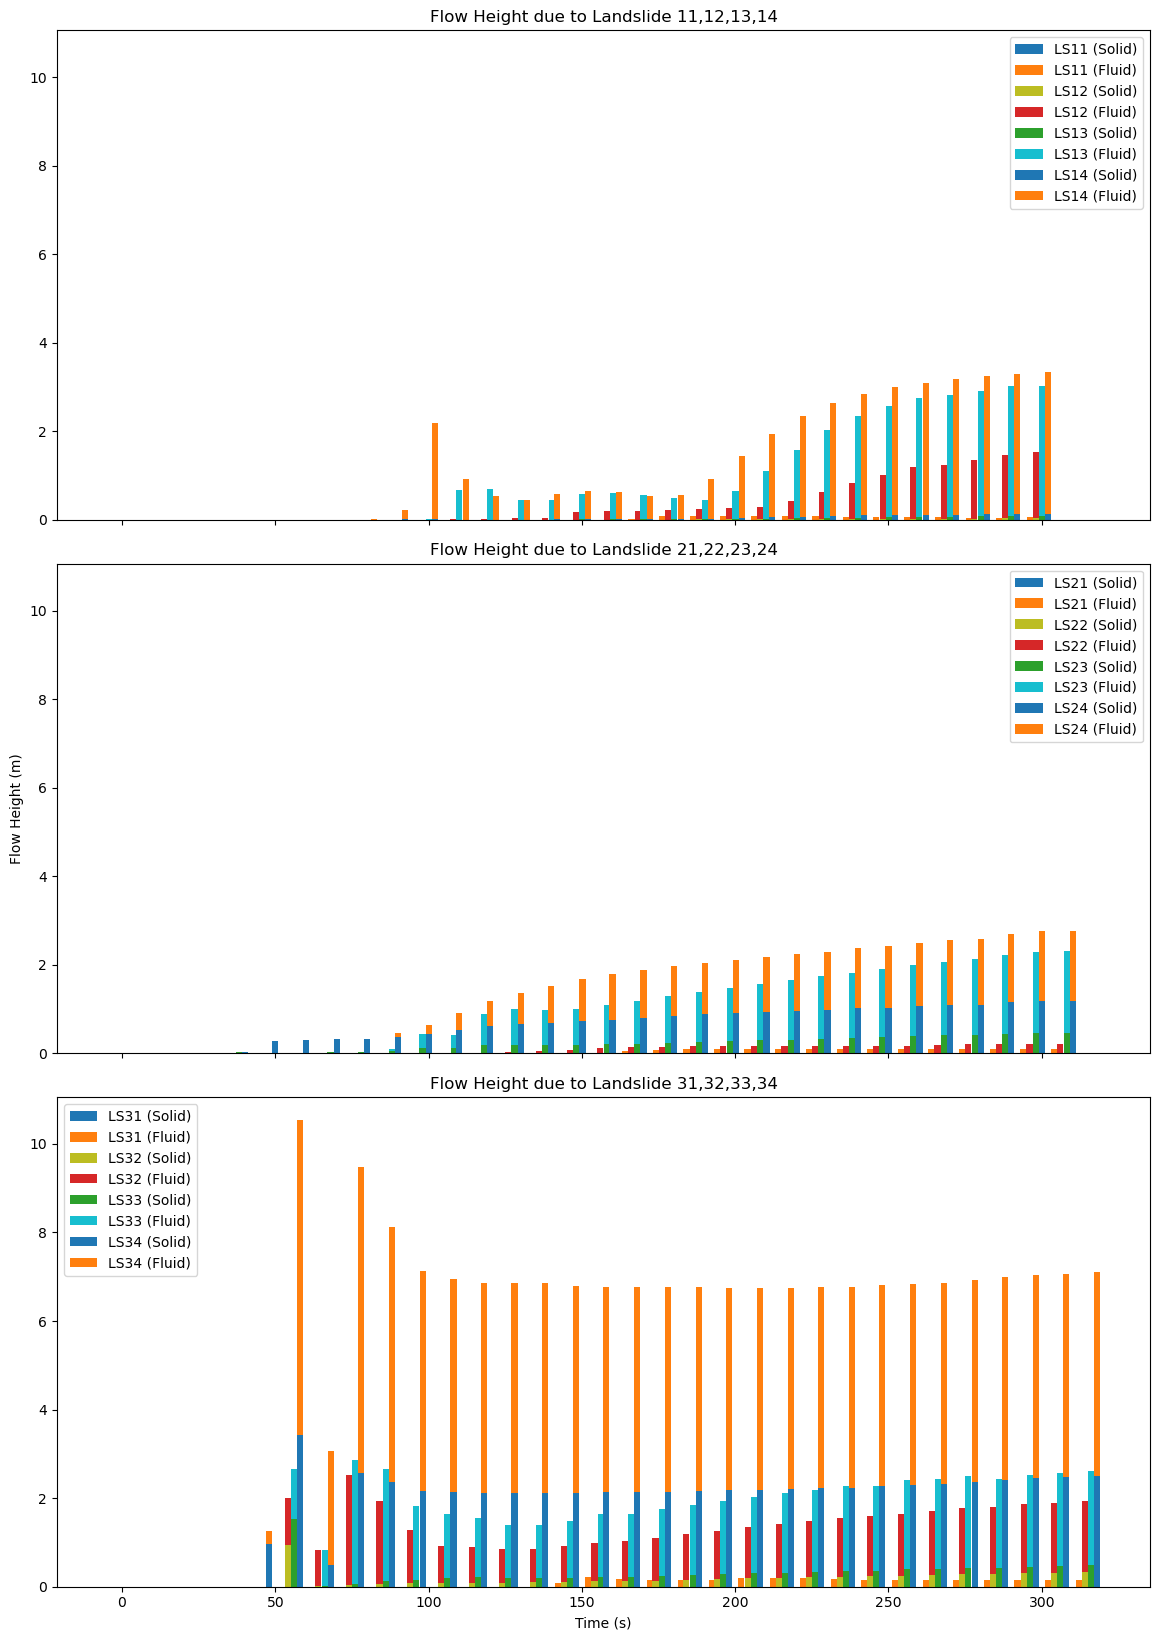

In [7]:
print_stacked_multiple_bars(HYDRO3, 
                            ['Flow Height due to Landslide 11,12,13,14', 
                             'Flow Height due to Landslide 21,22,23,24',
                             'Flow Height due to Landslide 31,32,33,34'])

In [8]:
def print_stacked_bars(in_files=[], graph_title=[], out_location='', bar_width=5, xlim=None):

    fig, ax = plt.subplots(3,4, sharex=True, sharey=True, figsize=(11.7,16.5))

    for i, hydro in enumerate(in_files):
        df = pd.read_csv(hydro, sep='\t')
        if i==0:
            ax[0,0].bar(df['T'], df['H1'], color='#ff7f0e', width=bar_width, label = 'Solid')
            ax[0,0].bar(df['T'], df['H3'], color='#1f77b4', width=bar_width, label='Fluid', bottom=df['H1'])

        if i ==1:
            ax[0, 1].bar(df['T'], df['H1'], color='#ff7f0e', width=bar_width, label = 'Solid')
            ax[0, 1].bar(df['T'], df['H3'], color='#1f77b4', width=bar_width, label='Fluid', bottom=df['H1'])
        
        if i==2:
            ax[0,2].bar(df['T'], df['H1'], color='#ff7f0e', width=bar_width, label = 'Solid')
            ax[0,2].bar(df['T'], df['H3'], color='#1f77b4', width=bar_width, label='Fluid', bottom=df['H1'])

        if i ==3:
            ax[0, 3].bar(df['T'], df['H1'], color='#ff7f0e', width=bar_width, label = 'Solid')
            ax[0, 3].bar(df['T'], df['H3'], color='#1f77b4', width=bar_width, label='Fluid', bottom=df['H1'])
            
        if i==4:
            ax[1,0].bar(df['T'], df['H1'], color='#ff7f0e', width=bar_width, label = 'Solid')
            ax[1,0].bar(df['T'], df['H3'], color='#1f77b4', width=bar_width, label='Fluid', bottom=df['H1'])

        if i ==5:
            ax[1, 1].bar(df['T'], df['H1'], color='#ff7f0e', width=bar_width, label = 'Solid')
            ax[1, 1].bar(df['T'], df['H3'], color='#1f77b4', width=bar_width, label='Fluid', bottom=df['H1'])
        
        if i==6:
            ax[1,2].bar(df['T'], df['H1'], color='#ff7f0e', width=bar_width, label = 'Solid')
            ax[1,2].bar(df['T'], df['H3'], color='#1f77b4', width=bar_width, label='Fluid', bottom=df['H1'])

        if i ==7:
            ax[1, 3].bar(df['T'], df['H1'], color='#ff7f0e', width=bar_width, label = 'Solid')
            ax[1, 3].bar(df['T'], df['H3'], color='#1f77b4', width=bar_width, label='Fluid', bottom=df['H1'])
            
        if i==8:
            ax[2,0].bar(df['T'], df['H1'], color='#ff7f0e', width=bar_width, label = 'Solid')
            ax[2,0].bar(df['T'], df['H3'], color='#1f77b4', width=bar_width, label='Fluid', bottom=df['H1'])

        if i ==9:
            ax[2, 1].bar(df['T'], df['H1'], color='#ff7f0e', width=bar_width, label = 'Solid')
            ax[2, 1].bar(df['T'], df['H3'], color='#1f77b4', width=bar_width, label='Fluid', bottom=df['H1'])
        
        if i==10:
            ax[2,2].bar(df['T'], df['H1'], color='#ff7f0e', width=bar_width, label = 'Solid')
            ax[2,2].bar(df['T'], df['H3'], color='#1f77b4', width=bar_width, label='Fluid', bottom=df['H1'])

        if i ==11:
            ax[2, 3].bar(df['T'], df['H1'], color='#ff7f0e', width=bar_width, label = 'Solid')
            ax[2, 3].bar(df['T'], df['H3'], color='#1f77b4', width=bar_width, label='Fluid', bottom=df['H1'])
        
    ax[0, 0].legend()
    ax[0,0].set_title(graph_title[0])
    ax[0,1].set_title(graph_title[1])
    ax[0,2].set_title(graph_title[2])
    ax[0,3].set_title(graph_title[3])
    ax[1,0].set_title(graph_title[4])
    ax[1,1].set_title(graph_title[5])
    ax[1,2].set_title(graph_title[6])
    ax[1,3].set_title(graph_title[7])
    ax[2,0].set_title(graph_title[8])
    ax[2,1].set_title(graph_title[9])
    ax[2,2].set_title(graph_title[10])
    ax[2,3].set_title(graph_title[11])
    
    ax[1,0].set_ylabel('Flow Height (m)')
    ax[2,2].set_xlabel('Time (s)')

#     # ax[1].set_xlabel("Time (s)")
#     ax[1].set_ylabel("Flow Height (m)")
#     ax[1].set_title(graph_title[1])

#     ax[2].set_xlabel("Time (s)")
#     # ax[2].set_ylabel("Discharge (m^3/s)")
#     ax[2].set_title(graph_title[2])

    plt.tight_layout()
    if out_location:
        plt.savefig(out_location, dpi=500)
    
    if xlim:
        plt.xlim(xlim)

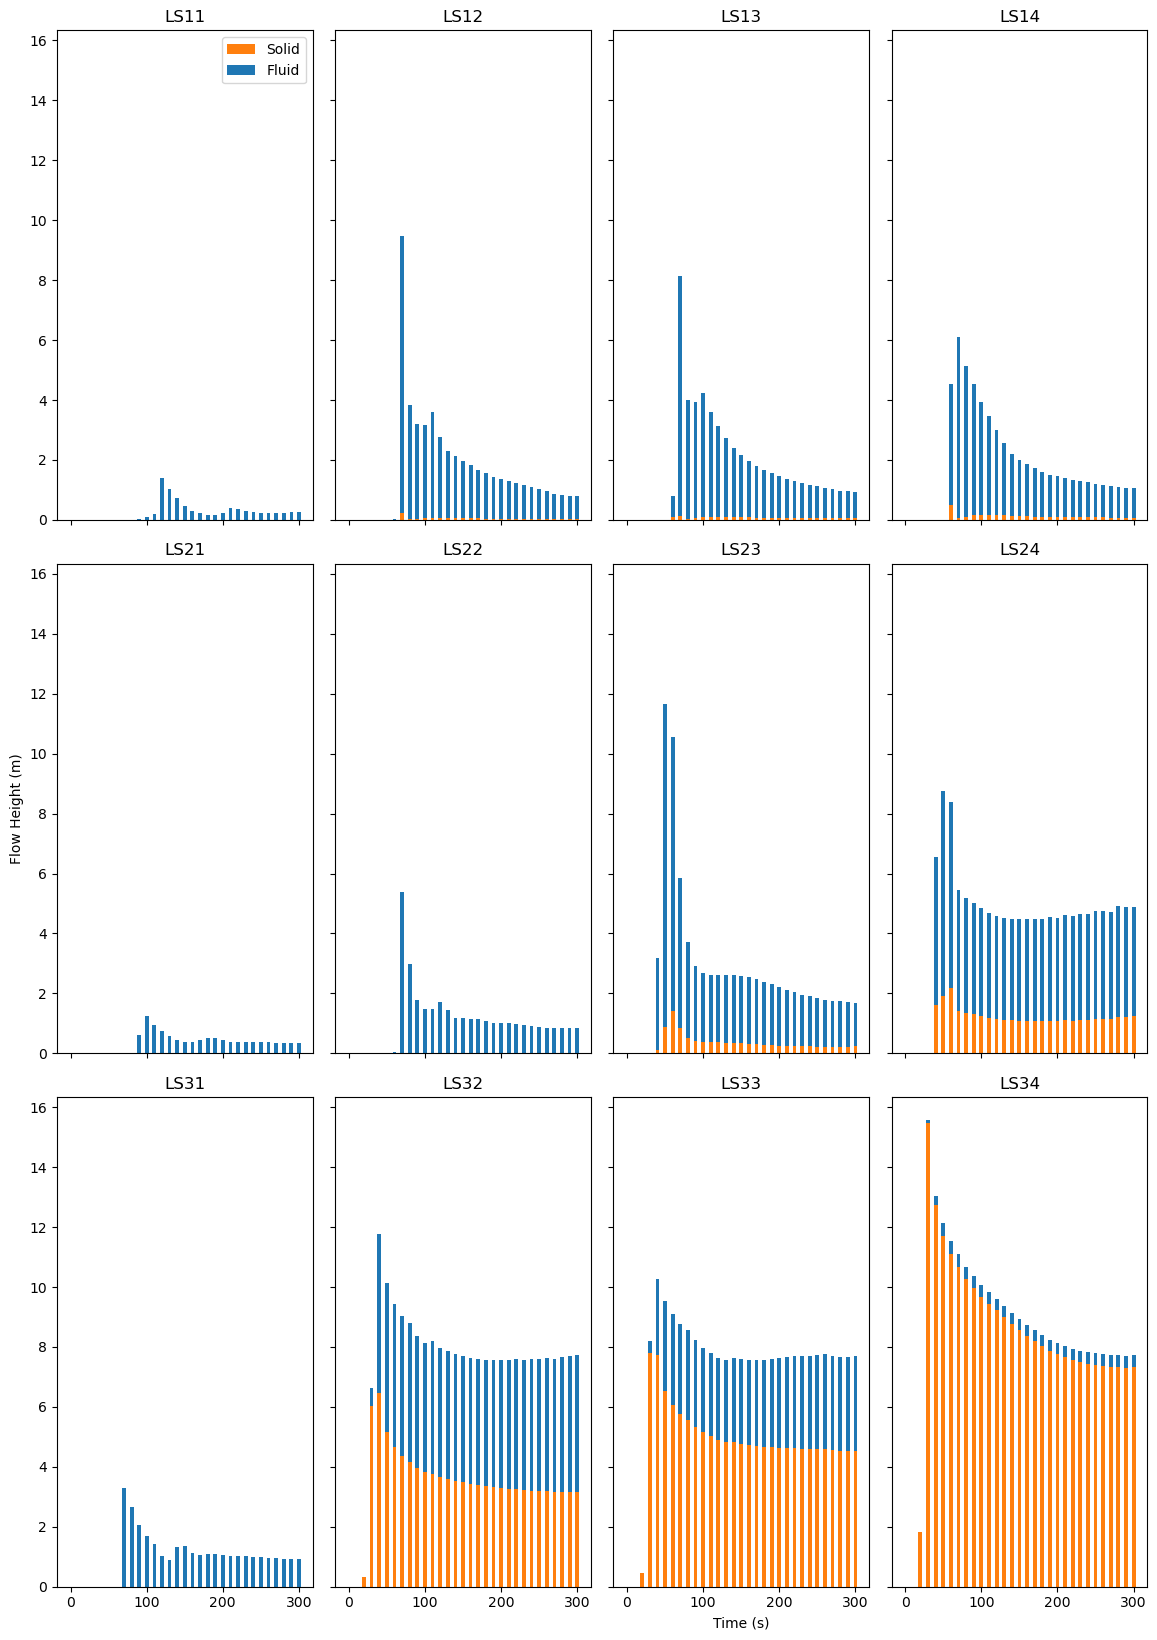

In [11]:
print_stacked_bars(HYDRO1, ['LS11', 'LS12','LS13',"LS14", 
                           'LS21', 'LS22','LS23',"LS24", 
                           'LS31', 'LS32','LS33',"LS34", ])